In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score


In [3]:
loan_pd = pd.read_csv(r'C:\Users\manoj.n.d\Documents\Data Scientist work\Loan prediction.csv')
loan_pd.head()
#Gives the first 5 dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan_pd.shape
#Shape of the data frame

(614, 13)

In [5]:
loan_pd.isnull().sum()
#Checking the isnull value

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
loan_pd[loan_pd['Gender'].isnull()]
#Checking the attribute of the gender 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


In [7]:
loan_pd.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
#loan id column is not required so drop the column
loan_pd.drop('Loan_ID', axis=1, inplace=True)
loan_pd.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [9]:
#Lets handle the missing values

#Gender column

loan_pd['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [10]:
#Checking the mode the most repeated data 
loan_pd['Gender'].mode()

0    Male
dtype: object

In [11]:
#Now filling the gender column with female since I just wanted to no offence sine the ratio of the data in Male is more so
loan_pd['Gender'].fillna('Female', axis=0, inplace=True)

In [12]:
loan_pd['Gender'].replace({'Male':1,
           'Female':0}, inplace=True)
#converting the categorical data into Numerical data so it will be very use full

In [13]:
loan_pd.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [14]:
loan_pd['Married'].mode()

0    Yes
dtype: object

loan_pd['Married'].fillna((loan_pd['Married'].mode()), inplace=True, axis=0)
loan_pd[loan_pd['Married'].isnull()]

In [15]:
#Will do the same thing to the Married attribute
#Only 3 column is null


loan_pd['Married'].fillna('Yes', inplace=True, axis=0)
loan_pd['Married'].replace({'Yes':1,
                           'No':0}, inplace=True)
loan_pd.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [16]:
loan_pd[loan_pd['Dependents'].isnull()]
#Lets fill the dependents with 1 that is yes  since most of the dependents with co-rellation with married is yes
loan_pd['Dependents'].fillna('1', inplace=True, axis=0)


In [17]:
loan_pd['Self_Employed'].value_counts()
#Most employees are not self employee so we will with mode 'No'

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [18]:
loan_pd['Self_Employed'].fillna('No', axis=0, inplace=True)
loan_pd.head(2)
#Filled the self employed with No which is mode

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [19]:
loan_pd.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
#For loan amount lets fill with Mean
loan_pd['LoanAmount'].mean()

146.41216216216216

In [21]:
loan_pd[loan_pd['Credit_History'].isnull()]
#So seeing the data lets fill Credit_history with mode

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
16,1,0,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
24,1,1,1,Graduate,No,3717,2925.0,151.0,360.0,NaN,Semiurban,N
30,1,1,1,Graduate,No,4166,3369.0,201.0,360.0,NaN,Urban,N
42,1,1,0,Graduate,No,2400,0.0,75.0,360.0,NaN,Urban,Y
79,1,1,3+,Not Graduate,Yes,3333,2166.0,130.0,360.0,NaN,Semiurban,Y
83,1,1,0,Graduate,No,6000,2250.0,265.0,360.0,NaN,Semiurban,N
86,1,1,2,Not Graduate,No,3333,2000.0,99.0,360.0,NaN,Semiurban,Y
95,1,0,0,Graduate,No,6782,0.0,NaN,360.0,NaN,Urban,N
117,1,1,1,Graduate,No,2214,1398.0,85.0,360.0,NaN,Urban,Y
125,0,0,0,Graduate,No,3692,0.0,93.0,360.0,NaN,Rural,Y


In [22]:
loan_pd['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [23]:
#Filling the loan amount and loan amount term and credit_history
loan_pd['LoanAmount'].fillna('147', axis=0, inplace=True)

loan_pd['Loan_Amount_Term'].fillna('340',axis=0, inplace=True)

loan_pd['Credit_History'].fillna('1',axis=0, inplace=True)


In [24]:
loan_pd.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [25]:
loan_pd['Property_Area'].value_counts()
#Checking the property area

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [26]:
#Replacing the value of the dependency with 4 where 3+ i sthere
loan_pd = loan_pd.replace(to_replace='3+', value=4)

In [27]:
loan_pd['Dependents'].value_counts()

0    345
1    117
2    101
4     51
Name: Dependents, dtype: int64

In [28]:
#Lets convert the loan status into numeric.
loan_pd['Loan_Status'].replace({'Y':1,
                               'N':0}, inplace=True)

<AxesSubplot:xlabel='Education', ylabel='count'>

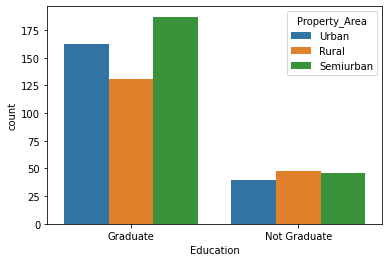

In [29]:
#data visualation
sns.countplot(x='Education', data=loan_pd, hue='Property_Area')

In [30]:
loan_pd.describe()

,Gender,Married,ApplicantIncome,CoapplicantIncome,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.796417,0.653094,5403.459283,1621.245798,0.687296
std,0.402991,0.476373,6109.041673,2926.248369,0.463973
min,0.000000,0.000000,150.000000,0.000000,0.000000
25%,1.000000,0.000000,2877.500000,0.000000,0.000000
50%,1.000000,1.000000,3812.500000,1188.500000,1.000000
75%,1.000000,1.000000,5795.000000,2297.250000,1.000000
max,1.000000,1.000000,81000.000000,41667.000000,1.000000


<AxesSubplot:xlabel='Education', ylabel='ApplicantIncome'>

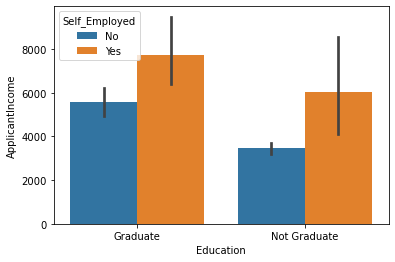

In [31]:
#Depedents info is not so much important if business says it's important I will add it.
#So my assumption lets not use it since python will think 4>3>2>1 so let's not use in ML model

#Education and self_employed looks important
sns.barplot(x='Education', y='ApplicantIncome', data=loan_pd, hue='Self_Employed')

<AxesSubplot:xlabel='Education', ylabel='ApplicantIncome'>

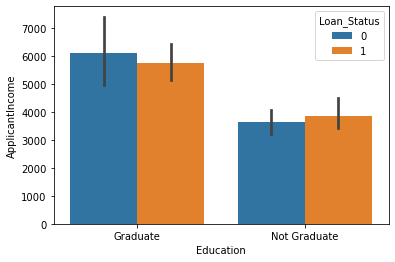

In [32]:
sns.barplot(x='Education', y='ApplicantIncome', data=loan_pd, hue='Loan_Status')
#We get it looks like the loan is granted and not granted for both Graduate and not graduate if they have a good income

In [33]:
loan_pd.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,Graduate,No,5849,0.0,147,360.0,1.0,Urban,1
1,1,1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0


In [34]:
loan_pd['Education'].value_counts()
#Getting the values_counts for the Education attribute.

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [35]:
loan_pd['Self_Employed'].value_counts()
#Getting the value_counts for the Self_employed attribute.

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [36]:
#Lets do the label encoding for the both Education and Self_employed

loan_pd['Education'].replace({'Graduate':1,
                             'Not Graduate':0}, inplace=True)

loan_pd['Self_Employed'].replace({'Yes':1,
                                 'No':0}, inplace=True)



In [37]:
loan_pd['LoanAmount'] = loan_pd['LoanAmount'].astype(float)
#Converting the loan Amount into float

In [38]:
#Lets convert the Loan_AMount_Term into int since it cannot be float
loan_pd['Loan_Amount_Term'] = loan_pd['Loan_Amount_Term'].astype(int)

In [39]:
#Lets convert the Credit_History attribute to int

loan_pd['Credit_History'] = loan_pd['Credit_History'].astype(int)

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

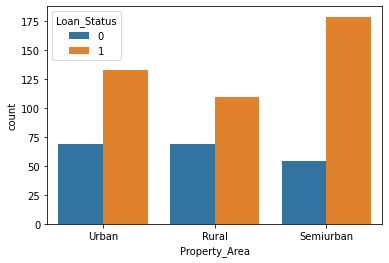

In [40]:
#loan_pd['Property_Area'].value_counts()

sns.countplot(x='Property_Area', data=loan_pd, hue='Loan_Status')
#Semi Urben area we get more loans
#Lets do one hot encoding by using get dummies

In [41]:
property_rus = pd.get_dummies(loan_pd['Property_Area'], prefix='P', drop_first=False)
loan_pd.drop('Property_Area', axis=1, inplace=True)

In [43]:
loan_pd.shape

(614, 11)

In [48]:
final_pd = pd.concat([loan_pd,property_rus], axis=1)
#Concatinating the two dataframe into one

In [50]:
final_pd.dtypes

Gender                 int64
Married                int64
Dependents            object
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term       int32
Credit_History         int32
Loan_Status            int64
P_Rural                uint8
P_Semiurban            uint8
P_Urban                uint8
dtype: object

In [52]:
final_pd.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,P_Rural,P_Semiurban,P_Urban
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.796417,0.653094,0.781759,0.133550,5403.459283,1621.245798,146.433225,341.954397,0.855049,0.687296,0.291531,0.379479,0.328990
std,0.402991,0.476373,0.413389,0.340446,6109.041673,2926.248369,84.037539,64.373182,0.352339,0.463973,0.454838,0.485653,0.470229
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
#I think we are good to proceed with the ml building
x=final_pd.drop('Loan_Status', axis=1)
y=final_pd['Loan_Status']

In [58]:
print(x.shape)
print(y.shape)

(614, 13)
(614,)


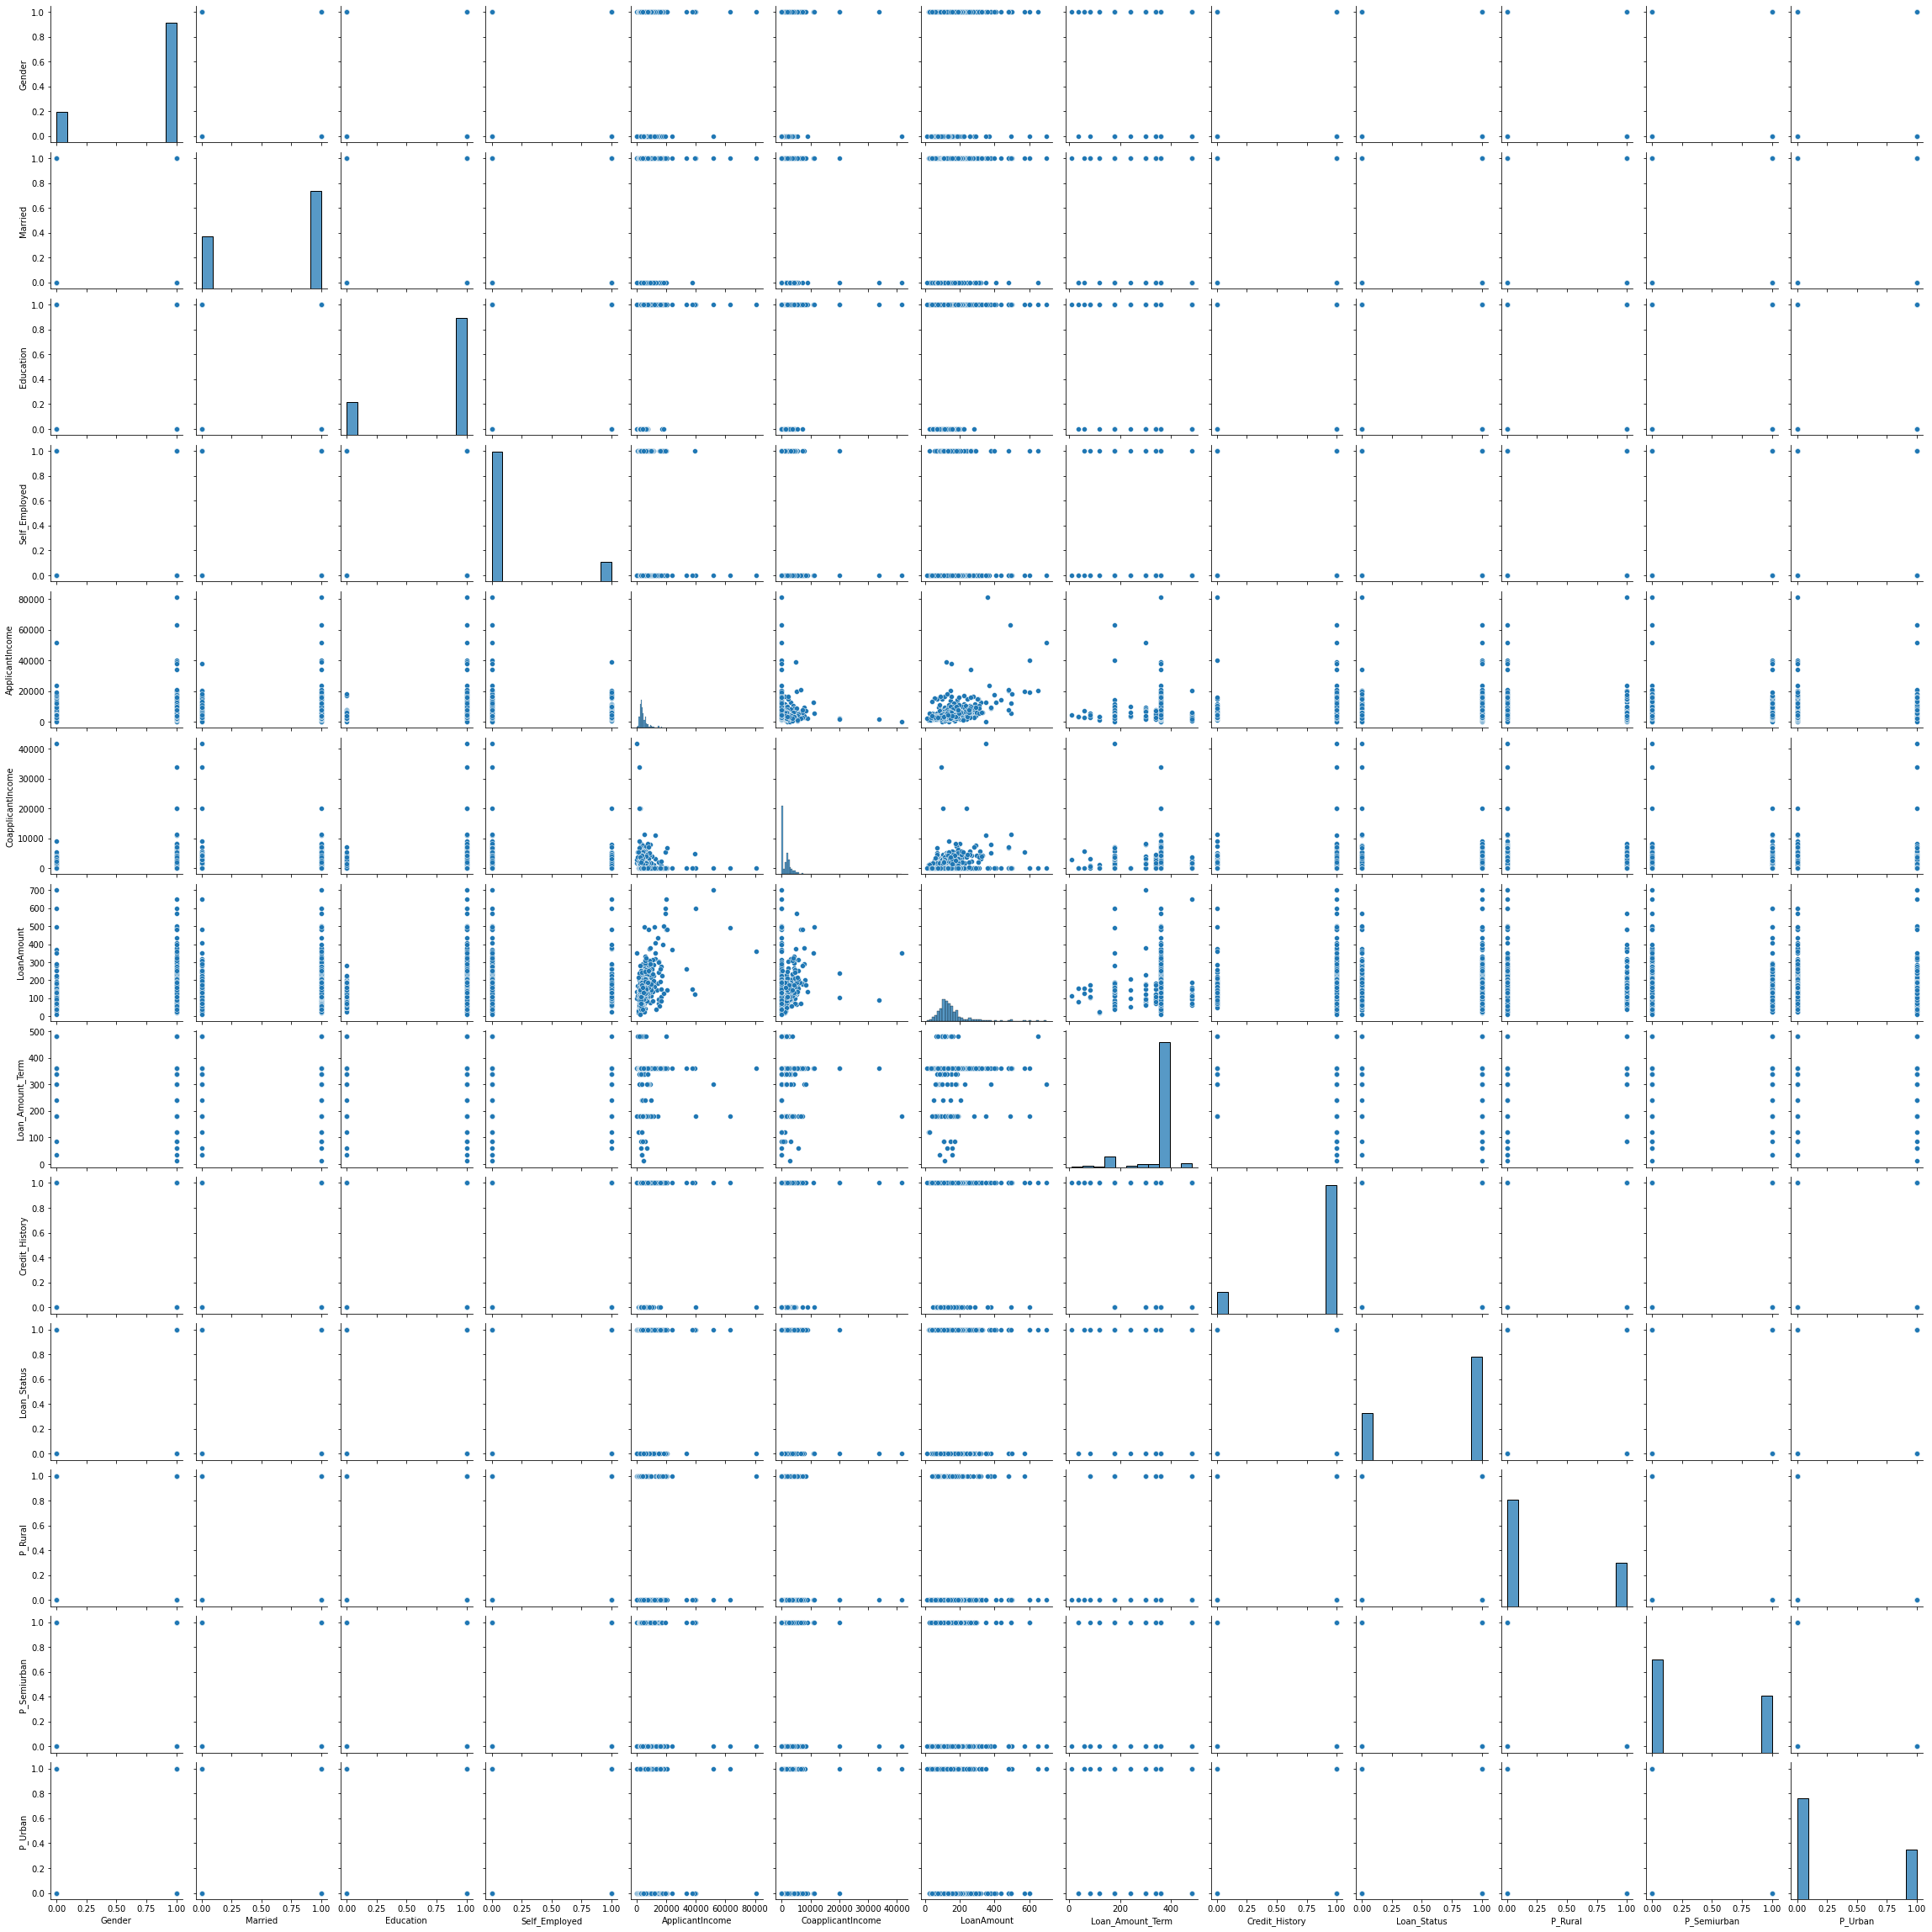

In [68]:
#Before the model training lets see the pair plot
sns.pairplot(final_pd)

<AxesSubplot:>

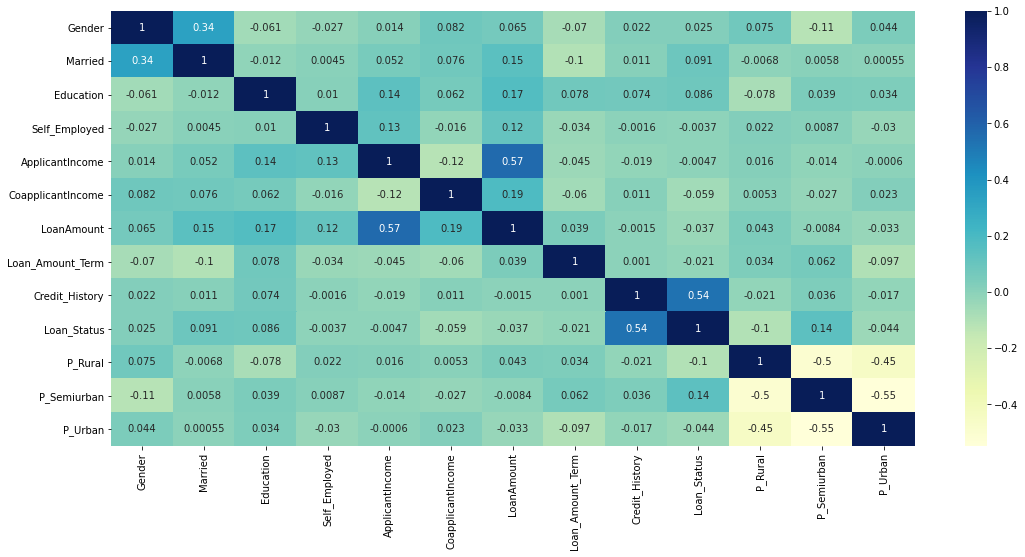

In [71]:
final_cor = final_pd.corr()
plt.figure(figsize=(18,8))
sns.heatmap(final_cor, annot=True, cmap='YlGnBu')

In [63]:
x_train, x_test,y_train, y_test = train_test_split(x,y, random_state=40, test_size=0.2)
#Split the data into different train and test 

In [64]:
print(y_train.shape)
print(y_test.shape)

(491,)
(123,)


In [75]:
#I don't want to see the test and train shape and all, SINCE IT has split in randomly 

model = SVC()
model.fit(x_train,y_train)
train_predict = model.predict(x_train)
test_predict  = model.predict(x_test)

In [81]:
#Lets see the accuracy_score


train_accuracy = accuracy_score(train_predict, y_train)
print(f'test_accuracy is : {train_accuracy}')
print('*'*30)


test_accuracy = accuracy_score(test_predict, y_test)
print(f'test_accuracy is : {test_accuracy}')

#Model is under fitted buddy

test_accuracy is : 0.6782077393075356
******************************
test_accuracy is : 0.7479674796747967


In [102]:
#Building the pipeline
from sklearn.pipeline import make_pipeline


In [104]:
pipe = make_pipeline(StandardScaler(), SVC())
pipe.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [105]:
train_predict = model.predict(x_train)
test_predict  = model.predict(x_test)

train_accuracy = accuracy_score(train_predict, y_train)
print(f'test_accuracy is : {train_accuracy}')
print('*'*30)


test_accuracy = accuracy_score(test_predict, y_test)
print(f'test_accuracy is : {test_accuracy}')

test_accuracy is : 0.6782077393075356
******************************
test_accuracy is : 0.7479674796747967


In [ ]:
#The accuracy is still the same #LEts do the splitting with cross val with different models

In [98]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report

In [100]:

print(f'confusion_matrix : {confusion_matrix(test_predict, y_test)}')
print(f'f1_score: {f1_score(test_predict,y_test)}')
print(f'Classification Report :{classification_report(test_predict, y_test)}')

confusion_matrix : [[ 0  0]
 [31 92]]
f1_score: 0.855813953488372
Classification Report :              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.75      0.86       123

    accuracy                           0.75       123
   macro avg       0.50      0.37      0.43       123
weighted avg       1.00      0.75      0.86       123



C:\Users\manoj.n.d\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\manoj.n.d\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\manoj.n.d\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [159]:
#Lets try with multiple models
#Lets import all the models

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#TO do cross validation
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#Importin the ROC and AUC curve
from sklearn.metrics import roc_auc_score, roc_curve

In [131]:
models =[]
models.append(RandomForestClassifier())
models.append(GradientBoostingClassifier())
models.append(KNeighborsClassifier())
models.append(SVC())

In [132]:
print(models)

[RandomForestClassifier(), GradientBoostingClassifier(), KNeighborsClassifier(), SVC()]


In [136]:
def  best_model(models):
    for i in range(len(models)):
        #print(i)
        skfold=StratifiedKFold(n_splits=15)
        cross_vc = cross_val_score(estimator=models[i], X=x, y=y, cv= skfold,n_jobs=-1, verbose=0)
        print(f'The best model accuracy is {models[i]} = {np.mean(cross_vc)}')    
        

In [137]:
best_model(models)

The best model accuracy is RandomForestClassifier() = 0.7965447154471545
The best model accuracy is GradientBoostingClassifier() = 0.7802439024390245
The best model accuracy is KNeighborsClassifier() = 0.620569105691057
The best model accuracy is SVC() = 0.6856910569105691


In [157]:
#lets do the hyper parameter tyning
model1  = RandomForestClassifier()
model1.fit(x_train,y_train)
test_predm1 = model1.predict(x_test)

roc_auc_predict = roc_auc_score(test_predm1, y_test)
print('ROC_AUC percentage is :',roc_auc_predict)


ROC_AUC percentage is : 0.7244433198380567


In [ ]:
RandomForestClassifier()
 n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,

In [167]:
#Random search cv

random_param   = {'n_estimators':[int(x) for x in np.linspace(200,2000,10)],
                 'criterion':['gini','entropy'],
                  'max_depth' : [int(x) for x in np.linspace(100,1000,10)],
                 'min_samples_split' :[3,5,7,9],
                 'min_samples_leaf' : [1,3,4,6,8,10],
                 'max_features' : ['auto','sqrt','log2'],
                 'max_leaf_nodes': [2,3,5,8]}
print(random_param)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'criterion': ['gini', 'entropy'], 'max_depth': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'min_samples_split': [3, 5, 7, 9], 'min_samples_leaf': [1, 3, 4, 6, 8, 10], 'max_features': ['auto', 'sqrt', 'log2'], 'max_leaf_nodes': [2, 3, 5, 8]}


In [166]:
rfc.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [168]:
rfc = RandomForestClassifier()
random_cv = RandomizedSearchCV(estimator=rfc,param_distributions=random_param, n_iter=100, n_jobs=-1, cv=15, verbose=2)
random_cv.fit(x_train,y_train)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


RandomizedSearchCV(cv=15, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [100, 200, 300, 400, 500,
                                                      600, 700, 800, 900,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'max_leaf_nodes': [2, 3, 5, 8],
                                        'min_samples_leaf': [1, 3, 4, 6, 8, 10],
                                        'min_samples_split': [3, 5, 7, 9],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
            

In [170]:
random_cv.best_params_

{'n_estimators': 2000,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_leaf_nodes': 3,
 'max_features': 'sqrt',
 'max_depth': 600,
 'criterion': 'gini'}

In [171]:
random_cv.best_estimator_

RandomForestClassifier(max_depth=600, max_features='sqrt', max_leaf_nodes=3,
                       min_samples_split=5, n_estimators=2000)

In [174]:
best_random_fit = random_cv.best_estimator_

In [175]:
param_grid = {'max_depth':[600],
             'max_features':['sqrt'],
             'max_leaf_nodes':[2,3,4],
             'min_samples_split':[4,5,6],
             'n_estimators':[2000,2100]}

In [176]:
grid_cv = GridSearchCV(estimator = rfc,param_grid=param_grid,n_jobs=-1, cv=10,verbose=2 )
grid_cv.fit(x_train,y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [600], 'max_features': ['sqrt'],
                         'max_leaf_nodes': [2, 3, 4],
                         'min_samples_split': [4, 5, 6],
                         'n_estimators': [2000, 2100]},
             verbose=2)

In [178]:
grid_cv.best_params_

{'max_depth': 600,
 'max_features': 'sqrt',
 'max_leaf_nodes': 3,
 'min_samples_split': 4,
 'n_estimators': 2000}

In [181]:
best_grid_cv = grid_cv.best_estimator_

In [185]:
train_pred = best_grid_cv.predict(x_test)
print(f'The accuracy is : {accuracy_score(y_test, train_pred)}')
print(f'The ROC AUC curve value is: {roc_auc_score(y_test, train_pred)}')
print(f'Confusion matrix is: {confusion_matrix(y_test,train_pred)}')
print(f'F1 score is :{f1_score(y_test,train_pred)}')
print(f'The classification report:{classification_report(y_test,train_pred)}')

The accuracy is : 0.8373983739837398
The ROC AUC curve value is: 0.6881136044880785
Confusion matrix is: [[12 19]
 [ 1 91]]
F1 score is :0.9009900990099009
The classification report:              precision    recall  f1-score   support

           0       0.92      0.39      0.55        31
           1       0.83      0.99      0.90        92

    accuracy                           0.84       123
   macro avg       0.88      0.69      0.72       123
weighted avg       0.85      0.84      0.81       123



In [186]:
import joblib


In [187]:
joblib.dump(best_grid_cv,'Loan_prediction.pkl')

['Loan_prediction.pkl']